# Section 1: Perform Operations on Quantum Circuits

1. Construct multi-qubit quantum registers
2. Measure quantum circuits in classical registers
3. Use single-qubit gates
4. Use multi-qubit gates
5. Use barrier operations
6. Return the circuit depth
7. Extend quantum circuits
8. Return the OpenQASM string for a circuit

# Section 2: Executing Experiments

1. Execute a quantum circuit

# Section 3: Implement BasicAer: Python-based Simulators

1. Use the available simulators

# Section 4: Implement Qasm

1. Read a QASM file and string

# Section 5: Compare and Contrast Quantum Information

1. Use classical and quantum registers
2. Use operators
3. Measure fidelity

# Section 6: Return the Experiment Results

1. Return and understand the histogram data of an experiment
2. Return and understand the statevector of an experiment
3. Return and understand the unitary of an experiment

# Section 7: Use Qiskit Tools

1. Monitor the status of a job instance

# Section 8: Display and Use System Information

1. Perform operations around the Qiskit version
2. Use information gained from %quiskit_backend_overview

# Section 9: Construct Visualizations

1. Draw a circuit
2. Plot a histogram of data
3. Plot a Bloch multivector
4. Plot a Bloch vector
5. Plot a QSphere
6. Plot a density matrix
7. Plot a gate map with error rates

# Section 10: Access Aer Provider

1. Access a statevector_simulator backend
2. Access a qasm_simulator backend
3. Access a unitary_simulator backend

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

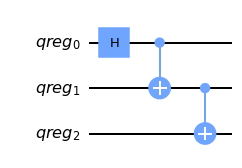

In [3]:
# A simple GHZ state Quantum Circuit

# Defining explicitly
qr = QuantumRegister(3,"qreg")
cr = ClassicalRegister(3,"creg")


qc = QuantumCircuit(qr)#,cr)

# No measurements 
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
#qc.measure_all()
qc.draw("mpl")

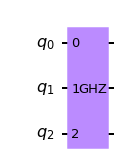

In [4]:
gate = qc.to_gate()
gate.name = "GHZ"
qc2 = QuantumCircuit(3)
qc2.append(gate, [0,1,2])
qc2.draw("mpl")

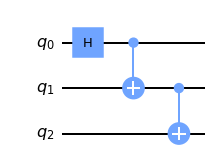

In [5]:
qc2.decompose().draw("mpl")

In [6]:
# Using statevector_simulator
backend = Aer.get_backend("statevector_simulator")
job = execute(qc, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()

sv = result.get_statevector()

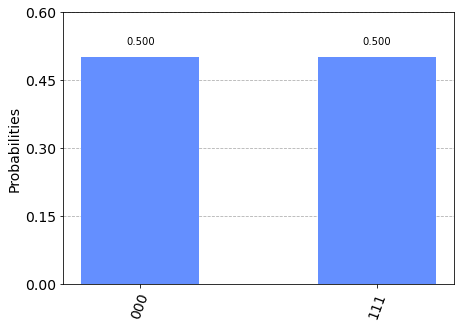

In [7]:
plot_histogram(counts)

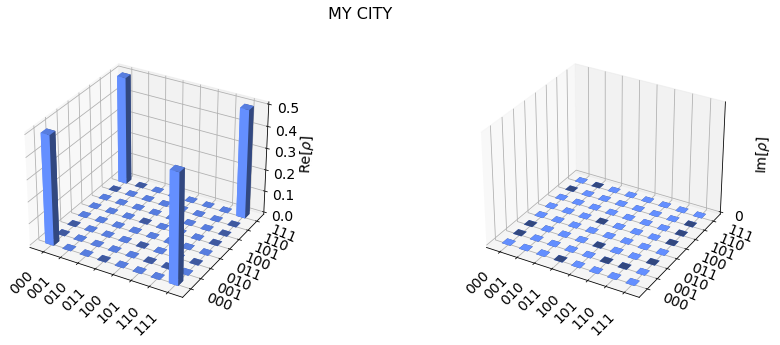

In [8]:
plot_state_city(sv,title="MY CITY")

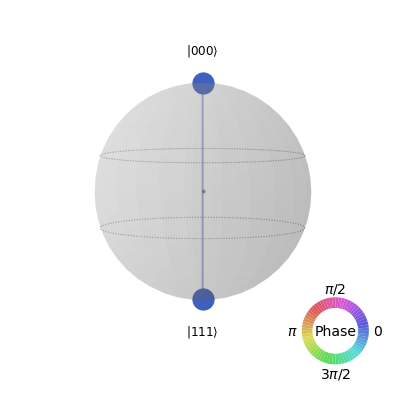

In [9]:
plot_state_qsphere(sv)

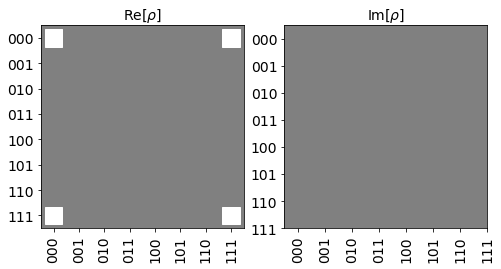

In [10]:
plot_state_hinton(sv)

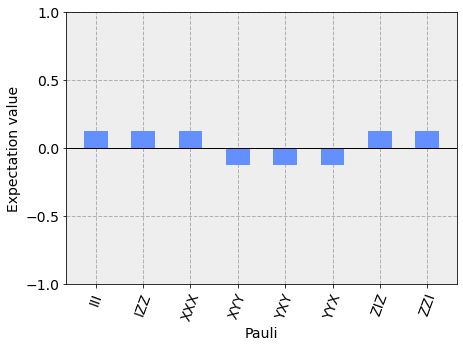

In [11]:
plot_state_paulivec(sv)

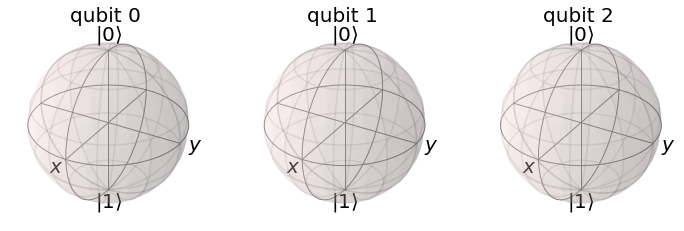

In [12]:
plot_bloch_multivector(sv)

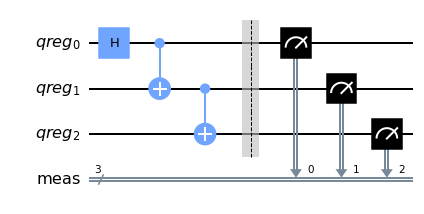

In [13]:

qc = QuantumCircuit(qr)#,cr)

# With measurements
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()
qc.draw("mpl")

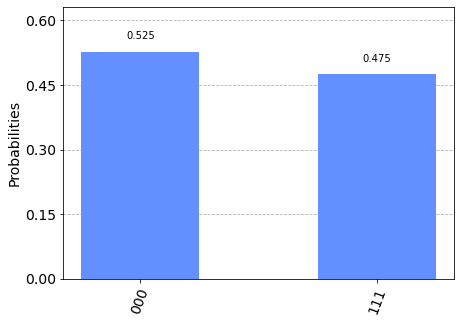

In [14]:
# Using qasm_simulator
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend = backend, shots = 1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [15]:
import qiskit.tools.jupyter
%qiskit_job_watcher 

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


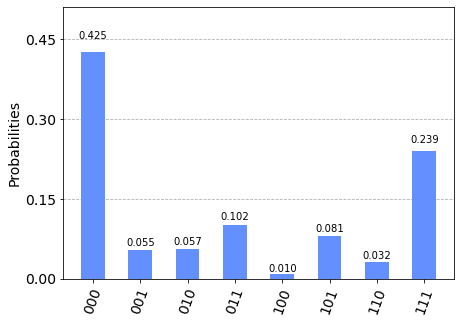

In [16]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_quito")
job = execute(qc, backend = backend, shots = 1024)

job_monitor(job)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

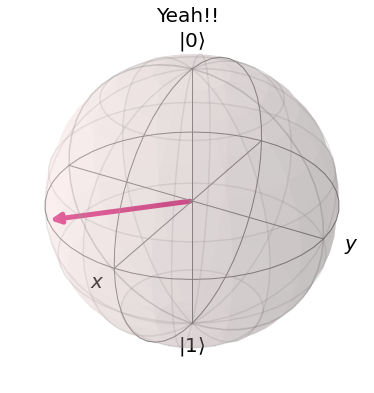

In [17]:
#help(plot_bloch_vector)
from math import pi
%matplotlib inline

plot_bloch_vector([1,pi/2,-pi/4], title="Yeah!!",coord_type='spherical')

In [18]:
qc.depth()

4

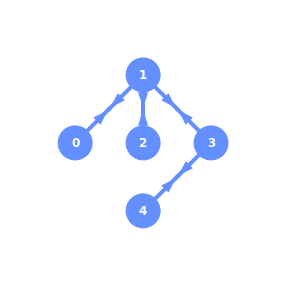

In [19]:
backend = provider.get_backend("ibmq_quito")
plot_gate_map(backend, plot_directed = True)

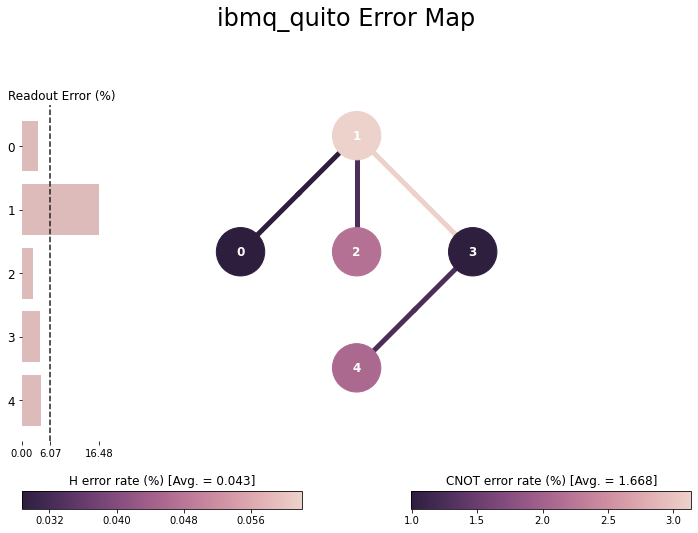

In [20]:
plot_error_map(backend)

In [21]:
IBMQ.providers()  

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

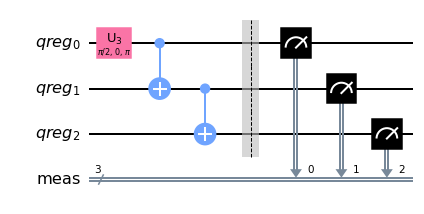

In [22]:
trans = transpile(qc, basis_gates=['cx','u3'])
trans.draw("mpl")

In [23]:
# Using unitary_simulator
backend = Aer.get_backend("unitary_simulator")
job = execute(qc, backend = backend, shots = 1024)
result = job.result()
unitary = result.get_unitary()

print(np.round(unitary,5))

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: AerSimulator: circuit with instructions {"instructions": {save_unitary, measure, gate}, "gates": {cx, h}} is not compatible with any available simulation methods


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [24]:
qiskit.__version__ 

'0.18.3'

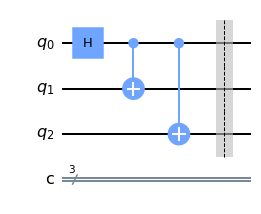

In [25]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
#qc.measure([0,1,2],[0,1,2])
qc.draw("mpl")

In [26]:
qasm_str = qc.qasm() #returning a qasm string, THIS SIMPLE
qasm_str

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\ncreg c[3];\nh q[0];\ncx q[0],q[1];\ncx q[0],q[2];\nbarrier q[0],q[1],q[2];\n'

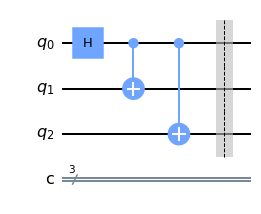

In [27]:
circ = QuantumCircuit.from_qasm_str(qasm_str) #you got to be kidding!
circ.draw("mpl") 

In [28]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

#these differ only by a phase so the gate and process
#fidelities are expected to be 1

a = average_gate_fidelity(op_a,op_b)
a

1.0

In [29]:
b = process_fidelity(op_a, op_b)
a == b

True

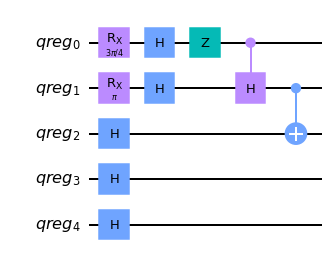

In [30]:
# A simple GHZ state Quantum Circuit
from qiskit.circuit.library import HGate
# Defining explicitly
qr = QuantumRegister(5,"qreg")
cr = ClassicalRegister(3,"creg")


qc = QuantumCircuit(qr)#,cr)

# No measurements
hg = HGate().control(1)
qc.rx(3*np.pi/4,0)
qc.rx(3*np.pi/3,1)
qc.h(range(5))
#qc.h(1)
qc.z(0)
#qc.cz(0,1)
qc.append(hg,[0,1])
qc.cx(1,2)
#qc.measure_all()
qc.draw("mpl")

In [31]:
# Using statevector_simulator
backend = Aer.get_backend("statevector_simulator")
job = execute(qc, backend = backend, shots = 1024)
result = job.result()
sv = result.get_statevector()
sv

array([-1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883e-01+9.56708581e-02j,
       -1.63320371e-01-6.76495125e-02j, -1.49395215e-18+9.81307787e-18j,
        1.63320371e-01+6.76495125e-02j, -2.30969883

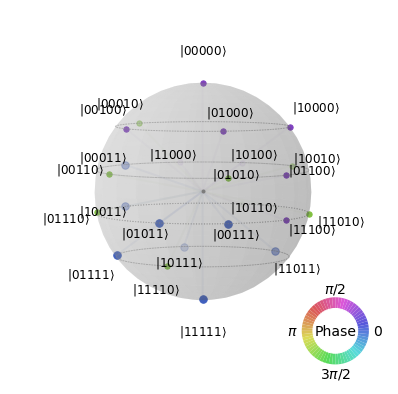

In [32]:
plot_state_qsphere(sv)

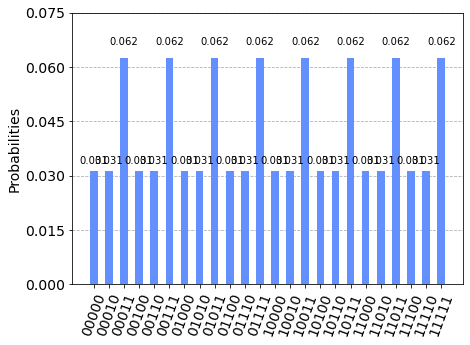

In [33]:
counts = result.get_counts()
plot_histogram(counts)

## The T-gate 
The T-gate is a very commonly used gate, it is an P-gate with  $\phi$$=$$\frac{π}{4}$

## The S-gates 
The S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with  $\phi$$=$$\frac{π}{2}$

 

In [34]:
!pip install pylatexenc

You should consider upgrading via the 'C:\Users\sitag\anaconda3\envs\cwq\python.exe -m pip install --upgrade pip' command.


In [2]:

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()
circuit.z(qreg_q[1])
circuit.barrier()
#circuit.h(qreg_q[0])

#circuit.h(qreg_q[1])
#circuit.h(qreg_q[2])



backend = Aer.get_backend("statevector_simulator")
job = execute(circuit, backend = backend, shots = 1024)
result = job.result()
sv = result.get_statevector()
display(circuit.draw("latex"),plot_state_qsphere(sv))

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
from qiskit.quantum_info import DensityMatrix, Operator

mat = np.zeros((9, 9))
mat[0, 0] = 0.25
mat[3, 3] = 0.25
mat[6, 6] = 0.25
mat[-1, -1] = 0.25
rho = DensityMatrix(mat, dims=(3, 3))
rho.draw('latex')

In [ ]:
from qiskit.visualization import array_to_latex
Y = Operator.from_label('H')
array_to_latex(Y.data, prefix='H =')

#### DENSITY MATRIX

In [ ]:
from qiskit.quantum_info import DensityMatrix

matrix1 = [[1+0.j, 0.5+0.j], [0.5+0.j, 1+0.j]]
matrix2 = [[0.5+0.j, 1+0.j], [0.5+0.j, 1+0.j]]

matrix = DensityMatrix(matrix1)
matrix.tensor(matrix2)

In [2]:
from qiskit.quantum_info import state_fidelity, average_gate_fidelity, process_fidelity
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import SGate, ZGate

gate1 = Operator(SGate())
gate2 = Operator(ZGate())

print(average_gate_fidelity(gate1, gate2))
print (process_fidelity(gate1, gate2))

0.6666666666666666
0.5000000000000001


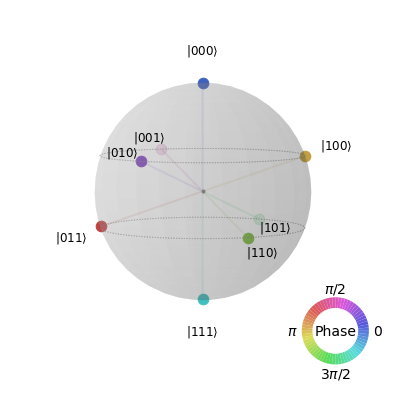

In [37]:
from qiskit import qiskit, QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

qr = QuantumRegister(3)
qc = QuantumCircuit(qr)

# Apply Z-axis phases to the qubits.
qc.h(qr)
qc.s(qr[0])
qc.t(qr[1])
qc.z(qr[2])

# Retrieve a state vector.
sv = Statevector.from_label('000') # or .from_int(0, 2**3)
sv_ev = sv.evolve(qc)
sv_ev.draw('qsphere')

In [38]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure([0], [0])

print(qc.depth())

2


# Note: OUTPUT IS REVERSED 